In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

DATA_FILE = '/home/jorgep/repos/MUSHRA/out.csv'

sns.set_style(style="ticks")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times']
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

In [2]:
df = pd.read_csv(DATA_FILE, skiprows=1)

# list all different test ids in the data
print(df['id'].unique())

# print max and min age
print(df['age'].max())
print(df['age'].min())

df.head()

['SPF05_aviao' 'SPF12_tiago' 'SPM14_tiago' 'SPM18_aviao' 'vowels']
61
22


,Unnamed: 0,uuid,score,gender,type,date,id,config,testId,time,email,age,comment,stimulus
0,0,e747dd3e-8402-43c5-9afb-fe28a643c15c,26,male,mushra,2024-07-13 15:55:03.009656,SPF05_aviao,configs/dynavoicer.yaml,dynavoicerII_testing,200497,NaN,54,NaN,segmented
1,1,e747dd3e-8402-43c5-9afb-fe28a643c15c,10,male,mushra,2024-07-13 15:55:03.009656,SPF05_aviao,configs/dynavoicer.yaml,dynavoicerII_testing,200497,NaN,54,NaN,pulseFilt
2,2,e747dd3e-8402-43c5-9afb-fe28a643c15c,92,male,mushra,2024-07-13 15:55:03.009656,SPF05_aviao,configs/dynavoicer.yaml,dynavoicerII_testing,200497,NaN,54,NaN,reference
3,3,e747dd3e-8402-43c5-9afb-fe28a643c15c,75,male,mushra,2024-07-13 15:55:03.009656,SPF05_aviao,configs/dynavoicer.yaml,dynavoicerII_testing,200497,NaN,54,NaN,whispered
4,4,e747dd3e-8402-43c5-9afb-fe28a643c15c,10,male,mushra,2024-07-13 15:55:03.009656,SPF05_aviao,configs/dynavoicer.yaml,dynavoicerII_testing,200497,NaN,54,NaN,frameFilt


               score           
                mean        std
stimulus                       
frameFilt  20.117647  13.945798
pulseFilt  22.823529  15.709214
reference  94.764706  12.656665
segmented  39.823529  19.339840
whispered  83.058824  16.157315


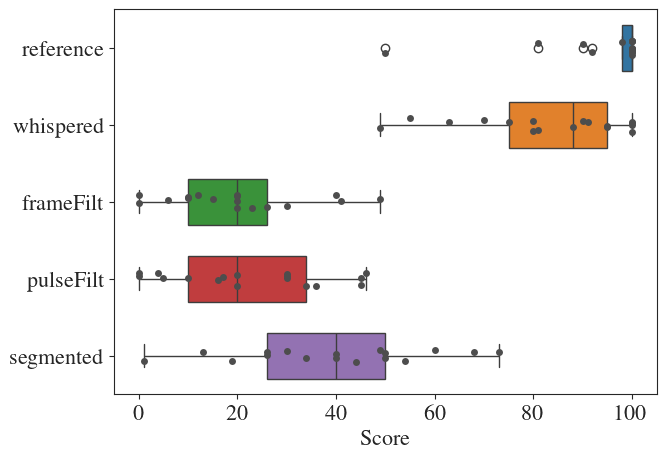

               score           
                mean        std
stimulus                       
frameFilt  19.941176  13.539159
pulseFilt  25.764706  13.339459
reference  98.000000   8.246211
segmented  38.294118  18.288537
whispered  85.352941  14.491123


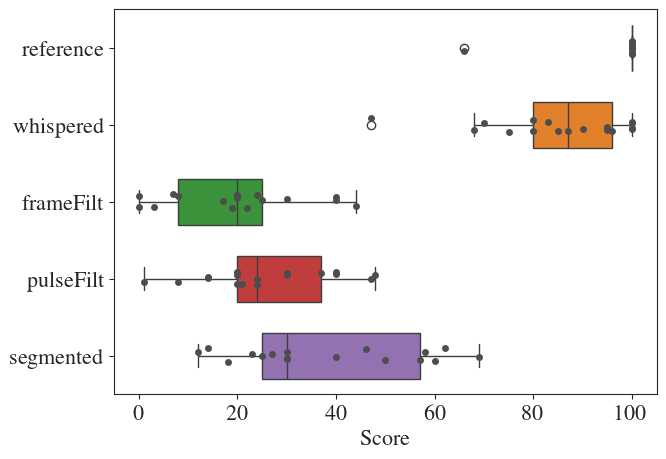

               score           
                mean        std
stimulus                       
frameFilt  23.588235  13.937624
pulseFilt  25.882353  14.521029
reference  96.058824  12.106148
segmented  34.823529  17.457933
whispered  81.588235  15.382859


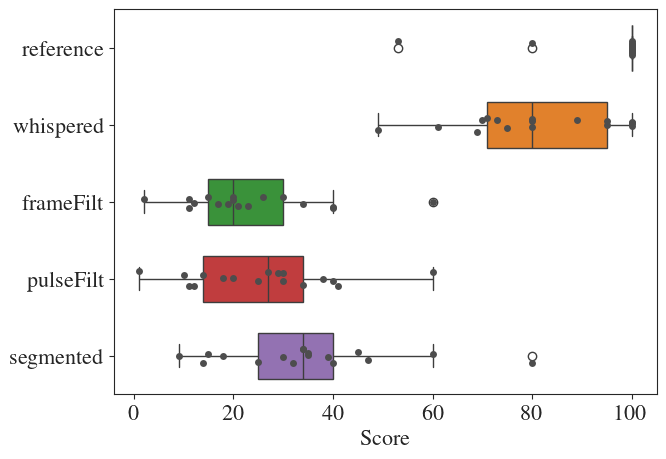

               score           
                mean        std
stimulus                       
frameFilt  22.882353  15.791146
pulseFilt  23.941176  16.479042
reference  95.647059  13.679095
segmented  37.117647  21.254065
whispered  85.117647  14.260445


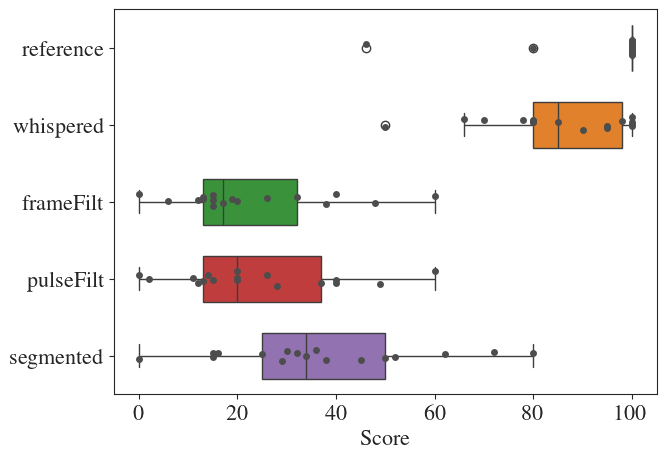

In [6]:
# Define the list of tests and the hue order
tests = ['SPF05_aviao', 'SPF12_tiago', 'SPM14_tiago', 'SPM18_aviao', 'vowels']
order = ['reference', 'whispered', 'frameFilt', 'pulseFilt', 'segmented']
hue_order = order  # Ensure the hue order is consistent

# Iterate through each test and plot the data
for test in tests:
    DATA_FILE = test
    if DATA_FILE == 'vowels':
        order = None
        hue_order = None
        continue

    # First set of data
    frame = df.loc[df['id'] == DATA_FILE]

    # Compute the mean, std and 95% confidence interval for each stimulus
    data = frame.groupby('stimulus').agg({'score': ['mean', 'std']})
    print(data)


    # Plot the data using seaborn

    fig, ax = plt.subplots(figsize=(7, 5))

    sns.boxplot(x='score', y='stimulus', data=frame, hue='stimulus', ax=ax, width=.6, order=order, hue_order=hue_order)
    sns.stripplot(x='score', y='stimulus', data=frame, jitter=True, color='.3', ax=ax, order=order, hue_order=hue_order)
    ax.set_ylabel(None)
    ax.set_xlabel('Score')

    # Save the figure before showing it
    #plt.savefig(f'/home/jorgep/OneDrive_JPais/Faculdade/Mestrado/Tese/txt/meec-distrib-v2022/figures/chapter7/{DATA_FILE}.pdf', format='pdf', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    # Close the figure to avoid overlap in subsequent plots
    plt.close(fig)

SPF05_aviao
                mean        std   n      ci95
stimulus                                     
frameFilt  20.117647  13.945798  17  6.629412
pulseFilt  22.823529  15.709214  17  7.467686
reference  94.764706  12.656665  17  6.016597
segmented  39.823529  19.339840  17  9.193576
whispered  83.058824  16.157315  17  7.680700


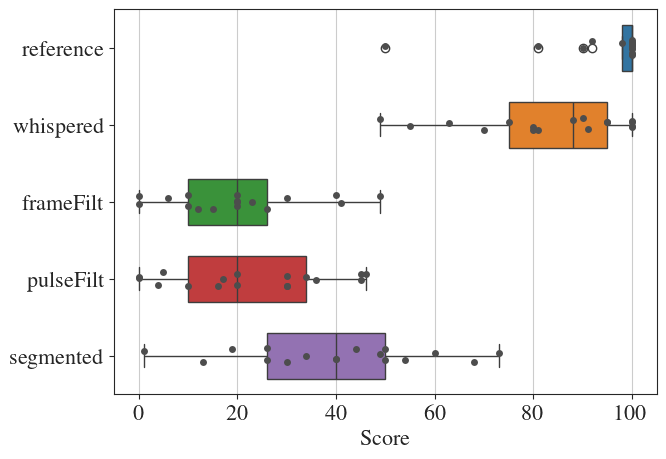

SPF12_tiago
                mean        std   n      ci95
stimulus                                     
frameFilt  19.941176  13.539159  17  6.436108
pulseFilt  25.764706  13.339459  17  6.341176
reference  98.000000   8.246211  17  3.920000
segmented  38.294118  18.288537  17  8.693819
whispered  85.352941  14.491123  17  6.888643


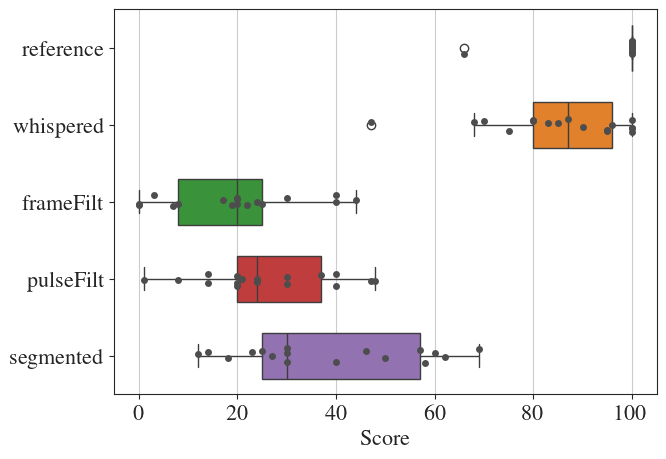

SPM14_tiago
                mean        std   n      ci95
stimulus                                     
frameFilt  23.588235  13.937624  17  6.625526
pulseFilt  25.882353  14.521029  17  6.902859
reference  96.058824  12.106148  17  5.754898
segmented  34.823529  17.457933  17  8.298974
whispered  81.588235  15.382859  17  7.312547


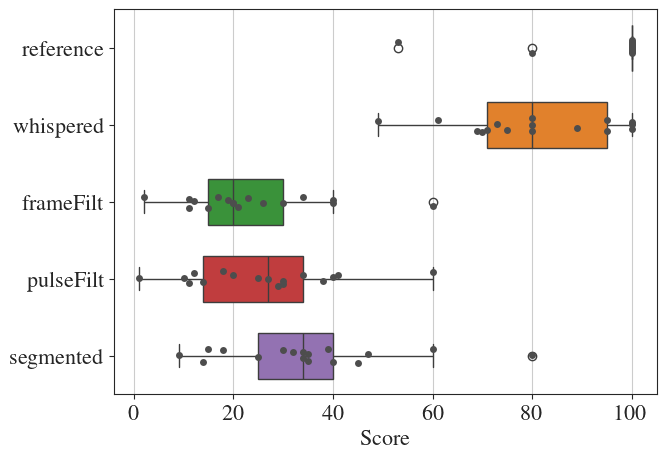

SPM18_aviao
                mean        std   n       ci95
stimulus                                      
frameFilt  22.882353  15.791146  17   7.506634
pulseFilt  23.941176  16.479042  17   7.833639
reference  95.647059  13.679095  17   6.502629
segmented  37.117647  21.254065  17  10.103541
whispered  85.117647  14.260445  17   6.778985


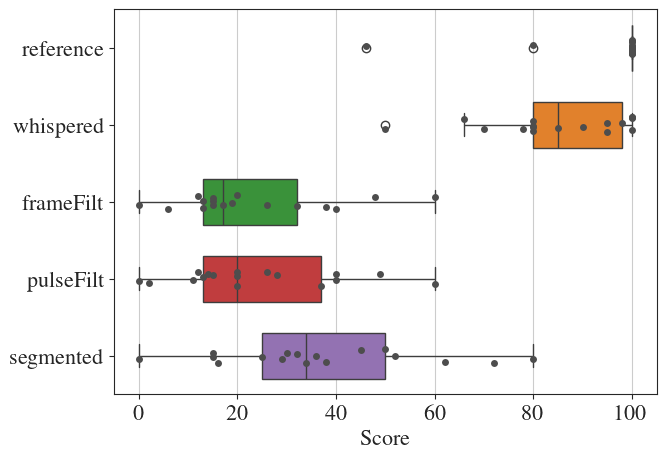

vowels
                mean        std   n       ci95
stimulus                                      
constant   57.882353  25.017200  17  11.892422
f0contour  67.529412  19.173933  17   9.114709
reference  80.529412  25.229243  17  11.993221


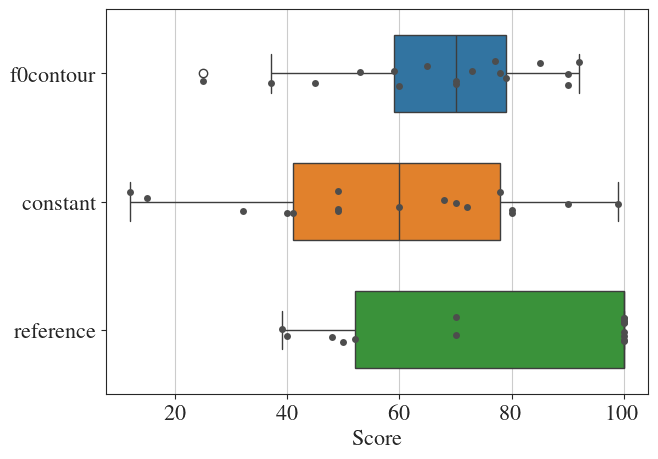

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Define the list of tests and the hue order
tests = ['SPF05_aviao', 'SPF12_tiago', 'SPM14_tiago', 'SPM18_aviao', 'vowels']
order = ['reference', 'whispered', 'frameFilt', 'pulseFilt', 'segmented']
hue_order = order  # Ensure the hue order is consistent

# Iterate through each test and plot the data
for test in tests:
    DATA_FILE = test
    if DATA_FILE == 'vowels':
        order = None
        hue_order = None

    # First set of data
    frame = df.loc[df['id'] == DATA_FILE]

    # Compute the mean, std, and 95% confidence interval for each stimulus
    data = frame.groupby('stimulus').agg(
        mean=('score', 'mean'),
        std=('score', 'std'),
        n=('score', 'size')
    )
    ci95 = []
    for mean, std, n in zip(data['mean'], data['std'], data['n']):
        margin_of_error = 1.96 * (std / np.sqrt(n))
        ci95.append(margin_of_error)

    data['ci95'] = ci95
    print(DATA_FILE)
    print(data)

    # Plot the data using seaborn
    fig, ax = plt.subplots(figsize=(7, 5))

    sns.boxplot(x='score', y='stimulus', data=frame, hue='stimulus', ax=ax, width=.6, order=order, hue_order=hue_order)
    sns.stripplot(x='score', y='stimulus', data=frame, jitter=True, color='.3', ax=ax, order=order, hue_order=hue_order)

    ax.set_ylabel(None)
    ax.set_xlabel('Score')
    ax.grid(True, axis='x')

    # Save the figure before showing it
    #plt.savefig(f'/home/jorgep/OneDrive_JPais/Faculdade/Mestrado/Tese/txt/meec-distrib-v2022/figures/chapter7/{DATA_FILE}.pdf', format='pdf', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    # Close the figure to avoid overlap in subsequent plots
    plt.close(fig)

In [5]:
order = ['reference', 'whispered', 'frameFilt', 'pulseFilt', 'segmented']

# compute p-values
for test in tests:
    DATA_FILE = test
    print('---------\n' + DATA_FILE + '\n---------')
    
    if DATA_FILE == 'vowels':
        order = ['reference', 'constant', 'f0contour']
        hue_order = order

    # First set of data
    frame = df.loc[df['id'] == DATA_FILE]

    # Compute the mean and std for each stimulus
    data = frame.groupby('stimulus').agg({'score': ['mean', 'std']})
    print(data)

    # Compute the p-values
    for i, stimulus in enumerate(order):
        for j in range(i + 1, len(order)):
            t, p = stats.ttest_rel(frame.loc[frame['stimulus'] == stimulus, 'score'], frame.loc[frame['stimulus'] == order[j], 'score'])
            print(f'{stimulus} vs {order[j]}: t={t:.2f}, p={p:.2e}')

---------
SPF05_aviao
---------
               score           
                mean        std
stimulus                       
frameFilt  20.117647  13.945798
pulseFilt  22.823529  15.709214
reference  94.764706  12.656665
segmented  39.823529  19.339840
whispered  83.058824  16.157315
reference vs whispered: t=2.18, p=4.46e-02
reference vs frameFilt: t=19.22, p=1.77e-12
reference vs pulseFilt: t=20.44, p=6.83e-13
reference vs segmented: t=12.36, p=1.34e-09
whispered vs frameFilt: t=15.68, p=3.94e-11
whispered vs pulseFilt: t=11.25, p=5.23e-09
whispered vs segmented: t=8.51, p=2.45e-07
frameFilt vs pulseFilt: t=-1.32, p=2.07e-01
frameFilt vs segmented: t=-7.65, p=9.81e-07
pulseFilt vs segmented: t=-6.69, p=5.22e-06
---------
SPF12_tiago
---------
               score           
                mean        std
stimulus                       
frameFilt  19.941176  13.539159
pulseFilt  25.764706  13.339459
reference  98.000000   8.246211
segmented  38.294118  18.288537
whispered  85.3529

In [ ]:
# Define the list of tests and the hue order
tests = ['SPF05_aviao', 'SPF12_tiago', 'SPM14_tiago', 'SPM18_aviao', 'vowels']
order = ['reference', 'whispered', 'frameFilt', 'pulseFilt', 'segmented']
hue_order = order  # Ensure the hue order is consistent


# Iterate through each test and plot the data
for test in tests:
    DATA_FILE = test
    if DATA_FILE == 'vowels':
        order = None
        hue_order = None
        continue

    # First set of data
    frame = df.loc[df['id'] == DATA_FILE]

    # Append the data to the aggregated DataFrame
    aggregated_data = pd.concat([aggregated_data, frame])

# Compute the mean, std and 95% confidence interval for each stimulus across all tests
data = aggregated_data.groupby('stimulus').agg(
    mean=('score', 'mean'),
    std=('score', 'std'),
    n=('score', 'size')
)
ci95 = []
for mean, std, n in zip(data['mean'], data['std'], data['n']):
    margin_of_error = 1.96 * (std / np.sqrt(n))
    ci95.append(margin_of_error)

data['ci95'] = ci95
print(data)

# Plot the aggregated data using seaborn
fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(x='score', y='stimulus', data=aggregated_data, hue='stimulus', ax=ax, width=.6, order=order, hue_order=hue_order)
sns.stripplot(x='score', y='stimulus', data=aggregated_data, jitter=True, color='.3', ax=ax, order=order, hue_order=hue_order)
ax.set_ylabel(None)
ax.set_xlabel('Score')

# Save the figure before showing it
#plt.savefig(f'/home/jorgep/OneDrive_JPais/Faculdade/Mestrado/Tese/txt/meec-distrib-v2022/figures/chapter7/aggregated.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Close the figure to avoid overlap in subsequent plots
plt.close(fig)